

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [1]:
#
# Import Libraries
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [2]:
# Your code to read data
data = pd.read_csv("MRTSSM448USN.csv", index_col="DATE", parse_dates=True)
# Print first few rows of data
data.head()

,MRTSSM448USN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [3]:
# Set name of column as 'Sales'. Use - df.columns 
data.rename(columns={'MRTSSM448USN':'Sales'}, inplace=True)
data.columns

Index(['Sales'], dtype='object')

Plot your data - Year vs Sales

<Axes: xlabel='DATE'>

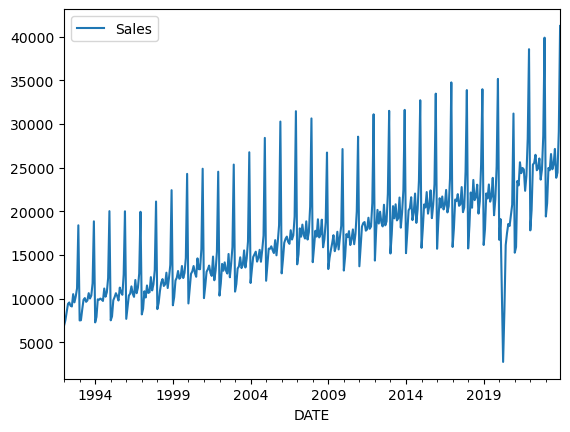

In [4]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
data.plot()

### Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [5]:
# Assign variable test size = 18
# Store length of data in variable length.
# store training size in varialable train_size (Remember training size = total size - test_size)

test_size = 18
total_size = len(data)
training_size = total_size - test_size

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [6]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size

Next, we will separate train and test datasets.

In [7]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.
# Store everthing from test_index to the last sample in test variable. Hint - Use df.iloc.

train = data.iloc[:training_size]
test = data.iloc[training_size:]

In [8]:
# Print the size of the train data
# Print the size of the test data
# Print the train data
# Print the test data

print(train.shape)
print(train)
print(test.shape)
print(test)

(366, 1)
              Sales
DATE               
1992-01-01   6938.0
1992-02-01   7524.0
1992-03-01   8475.0
1992-04-01   9401.0
1992-05-01   9558.0
...             ...
2022-02-01  20152.0
2022-03-01  25347.0
2022-04-01  25539.0
2022-05-01  26470.0
2022-06-01  24701.0

[366 rows x 1 columns]
(18, 1)
              Sales
DATE               
2022-07-01  24904.0
2022-08-01  26049.0
2022-09-01  23629.0
2022-10-01  24787.0
2022-11-01  28645.0
2022-12-01  39883.0
2023-01-01  19405.0
2023-02-01  20937.0
2023-03-01  24963.0
2023-04-01  24700.0
2023-05-01  26557.0
2023-06-01  24809.0
2023-07-01  25364.0
2023-08-01  27143.0
2023-09-01  23840.0
2023-10-01  24438.0
2023-11-01  29150.0
2023-12-01  41228.0


### In Neural Networks, we need to Scale Data between 0-1

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
#
# Check if the data has been scaled properly
#

print(scaled_train)
print(scaled_test)

[[0.11688819]
 [0.13325142]
 [0.15980677]
 [0.18566402]
 [0.19004803]
 [0.17954875]
 [0.17734279]
 [0.21671507]
 [0.19046688]
 [0.20948285]
 [0.23553557]
 [0.43680889]
 [0.1326371 ]
 [0.13325142]
 [0.16793254]
 [0.19867642]
 [0.20414945]
 [0.19219815]
 [0.196638  ]
 [0.21992628]
 [0.20275327]
 [0.21205183]
 [0.2515358 ]
 [0.44954205]
 [0.12643807]
 [0.14380655]
 [0.2001843 ]
 [0.19873227]
 [0.20264157]
 [0.19940243]
 [0.19499051]
 [0.23469787]
 [0.20844968]
 [0.22277449]
 [0.26812242]
 [0.48207305]
 [0.13308388]
 [0.14545404]
 [0.19722439]
 [0.20708143]
 [0.21970289]
 [0.21079526]
 [0.19635876]
 [0.23768569]
 [0.22221602]
 [0.21464872]
 [0.27920809]
 [0.48168212]
 [0.1377192 ]
 [0.17421535]
 [0.2121356 ]
 [0.21830671]
 [0.24162292]
 [0.21785994]
 [0.20803083]
 [0.26197922]
 [0.21978666]
 [0.23729476]
 [0.28267061]
 [0.48006255]
 [0.15196024]
 [0.16985927]
 [0.22584609]
 [0.20604825]
 [0.24441528]
 [0.2206523 ]
 [0.22288618]
 [0.27111024]
 [0.22869429]
 [0.24804535]
 [0.29297442]
 [0.51

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [13]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11688819 0.13325142 0.15980677 0.18566402 0.19004803 0.17954875
 0.17734279 0.21671507 0.19046688 0.20948285 0.23553557 0.43680889]
Predict this y: 
 [[0.1326371]]


### Create the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [15]:
# We're only using one feature in our time series
n_features = 1

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [16]:
# 
# Your code to create your own model
#

model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 25401 (99.22 KB)
Trainable params: 25401 (99.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [19]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Your code to create an object early-stop.
early_stop = EarlyStopping(monitor='val_loss', patience=5)

Now, fit your model.

In [21]:
# Your code to fit your model.

history = model.fit(generator, verbose = 1, callbacks=[early_stop], validation_data=validation_generator, epochs = 100)

Epoch 1/100

354/354 [==============================] - 6s 6ms/step - loss: 0.0199 - val_loss: 0.0435
Epoch 2/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0228
Epoch 3/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0085 - val_loss: 0.0468
Epoch 4/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0124 - val_loss: 0.0255
Epoch 5/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 6/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 7/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 8/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 9/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 10/100
354/354 [==============================] - 1s 4ms/step - loss: 0.0023 - val_l

<Axes: >

<Figure size 1000x1000 with 0 Axes>

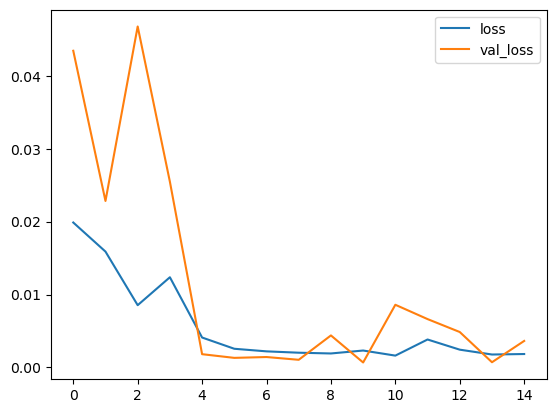

In [22]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.

losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
losses[['loss','val_loss']].plot()

## Evaluate on Test Data

In [23]:
first_eval_batch = scaled_train[-length:]

In [24]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)


1/1 [==============================] - 0s 468ms/step


array([[0.6896157]], dtype=float32)

In [25]:
# compare with the true result:
scaled_test[0]

array([0.61856361])

#### Try predicting the series!

In [26]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 44ms/step


## Inverse Transformations and Compare

In [27]:
true_predictions = scaler.inverse_transform(test_predictions)

In [28]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions
true_predictions = test['Predictions'].copy()
true_predictions

C:\Users\sasen\AppData\Local\Temp\ipykernel_10384\1035674157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


DATE
2022-07-01    27448.518396
2022-08-01    29700.655854
2022-09-01    25783.479283
2022-10-01    29091.836212
2022-11-01    32776.469379
2022-12-01    41131.207279
2023-01-01    25304.509288
2023-02-01    29107.982035
2023-03-01    32792.175483
2023-04-01    33151.827757
2023-05-01    33729.858483
2023-06-01    32869.715566
2023-07-01    33704.077249
2023-08-01    35912.486079
2023-09-01    32403.770666
2023-10-01    34286.876586
2023-11-01    35332.696474
2023-12-01    41868.070729
Name: Predictions, dtype: float64

# Check and plot predictions

In [29]:
# Print the test variable.
test

,Sales,Predictions
DATE,,
2022-07-01,24904.0,27448.518396
2022-08-01,26049.0,29700.655854
2022-09-01,23629.0,25783.479283
2022-10-01,24787.0,29091.836212
2022-11-01,28645.0,32776.469379
2022-12-01,39883.0,41131.207279
2023-01-01,19405.0,25304.509288
2023-02-01,20937.0,29107.982035
2023-03-01,24963.0,32792.175483


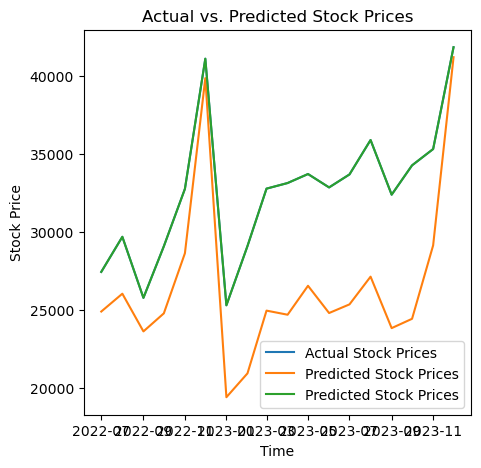

In [30]:
# Your code to plot actual sales and predictions.
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(true_predictions, label='Actual Stock Prices')
plt.plot(test, label='Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()  # Add grid lines
plt.show()

# Retrain and Forecasting

In [31]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data)

In [32]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [33]:
#
# Use any neural network model based on RNN
#
# Create the model
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 25401 (99.22 KB)
Trainable params: 25401 (99.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [35]:
# use early_stop
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [36]:
# fit the model
history = model.fit(generator, verbose = 1, callbacks=[early_stop], validation_data=validation_generator, epochs = 100)

Epoch 1/100
372/372 [==============================] - 5s 5ms/step - loss: 0.0167 - val_loss: 0.0552
Epoch 2/100
372/372 [==============================] - 2s 4ms/step - loss: 0.0078 - val_loss: 0.0086
Epoch 3/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0073 - val_loss: 0.0647
Epoch 4/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 5/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 9.7235e-04
Epoch 6/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 7/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 8/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 9/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 10/100
372/372 [==============================] - 1s 4ms/step - loss: 0.0020 - va

In [37]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for  grabbing just the number instead of [array])
    prediction_i = model.predict(current_batch)[0]
    
    # store prediction forecast.append(current_pred) 
    forecast.append(prediction_i) 

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[prediction_i]],axis=1)

1/1 [==============================] - 0s 42ms/step


In [38]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [39]:
data

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-08-01,27143.0
2023-09-01,23840.0
2023-10-01,24438.0


In [40]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [41]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [42]:
forecast_df

,Forecast
2024-01-01,15729.353973
2024-02-01,17570.530701
2024-03-01,19116.077060
2024-04-01,17060.496432
2024-05-01,17570.364205
2024-06-01,14210.506710
2024-07-01,13618.479664
2024-08-01,14301.797638
2024-09-01,13378.430075
2024-10-01,12492.594507


<Axes: xlabel='DATE'>

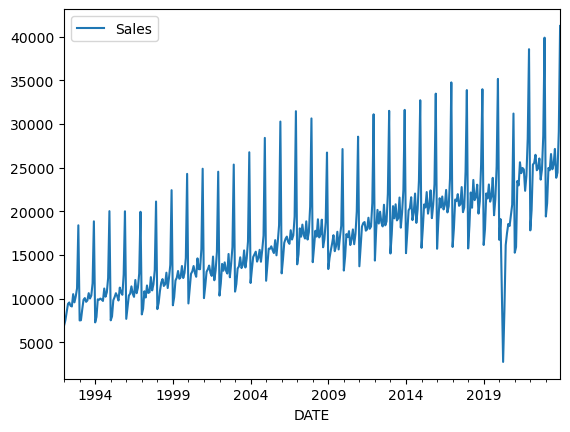

In [43]:
# Plot sales - Values in dataframe
data.plot()

<Axes: >

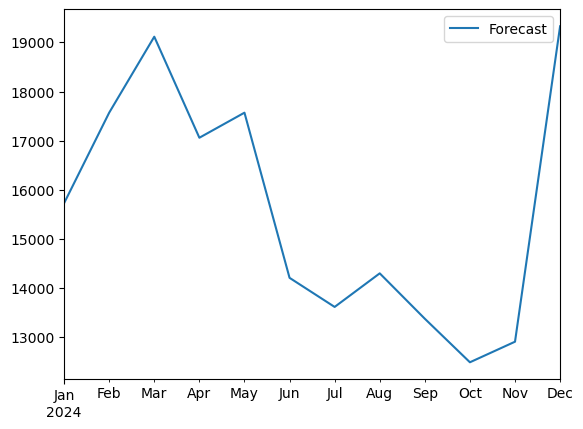

In [44]:
# Plot forecast - Values in forecast_df
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

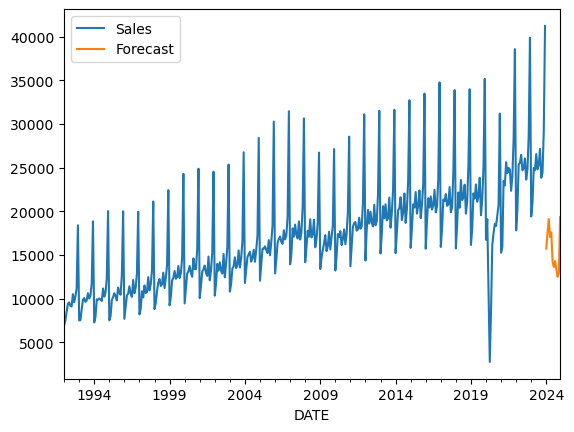

In [45]:
ax = data.plot()
forecast_df.plot(ax=ax)

(624.0, 660.0)

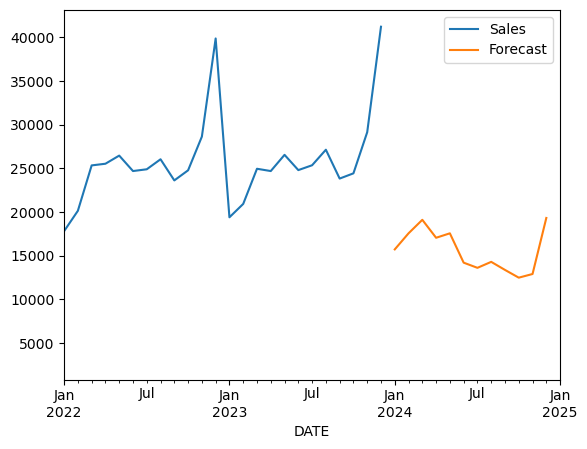

In [46]:
ax = data.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!